In [1]:
%config IPCompleter.greedy=True

### Simple Linear Regregssion (Independent Variable =1)

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data=pd.read_csv("tvmarketing.csv")
print(data.shape)
data.head()

(200, 2)


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


### Goal is to predict Sales (output variable) using TV (Predictor)

In [4]:
#plt.plot(data['TV'],data['Sales'])
#plt.show()

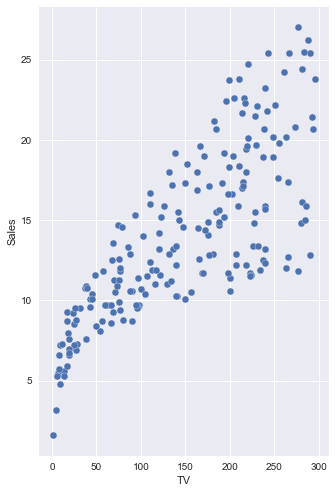

In [14]:
sns.pairplot(data, x_vars=['TV'],y_vars='Sales',kind='scatter',size=7,aspect=.7)
plt.show()

In [34]:
X=data['TV']
y=data['Sales']
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [35]:
import numpy as np
print(type(x_test))
print(type(x_train))
x_train=x_train[:,np.newaxis]
x_test=x_test[:,np.newaxis]
print(type(x_test))
print(type(x_train))
print(type(y_test))
print(type(y_train))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [71]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
y_pred=lr.predict(x_test)

In [74]:
print("Equation of line y={}x+{}".format(lr.coef_[0],lr.intercept_))

Equation of line y=0.046497358747865765x+6.989665857411679


In [77]:
from sklearn.metrics import mean_squared_error, r2_score
#order is important first is actual and than predicted value
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_pred,y_test))

0.594298726778
7.97579853285


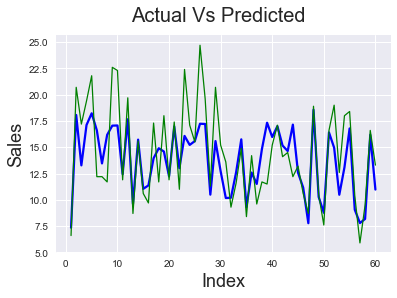

In [84]:
fig=plt.figure()
fig.suptitle('Actual Vs Predicted',fontsize=20)
c=[i for i in range(1,61,1)]
plt.plot(c,y_pred,color='blue',linewidth=2.25,linestyle='-')
plt.plot(c,y_test,color='green',linewidth=1.25,linestyle='-')
plt.xlabel('Index',fontsize=18)
plt.ylabel('Sales',fontsize=18)
plt.show()

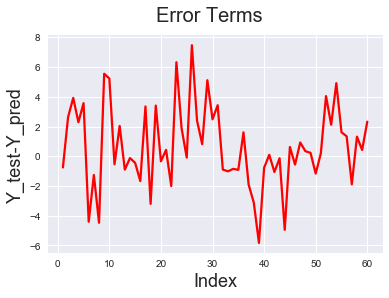

In [91]:
fig=plt.figure()
fig.suptitle('Error Terms', fontsize=20)
plt.plot(c,y_test-y_pred,color='red',linestyle='-',linewidth=2.25)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Y_test-Y_pred',fontsize=18)
plt.show()

### Multiple Linear regression : Manual

#### Manual refinement of variables using p-value and coefficient

In [95]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [96]:
advertising=pd.read_csv('advertising.csv')

In [97]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [98]:
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


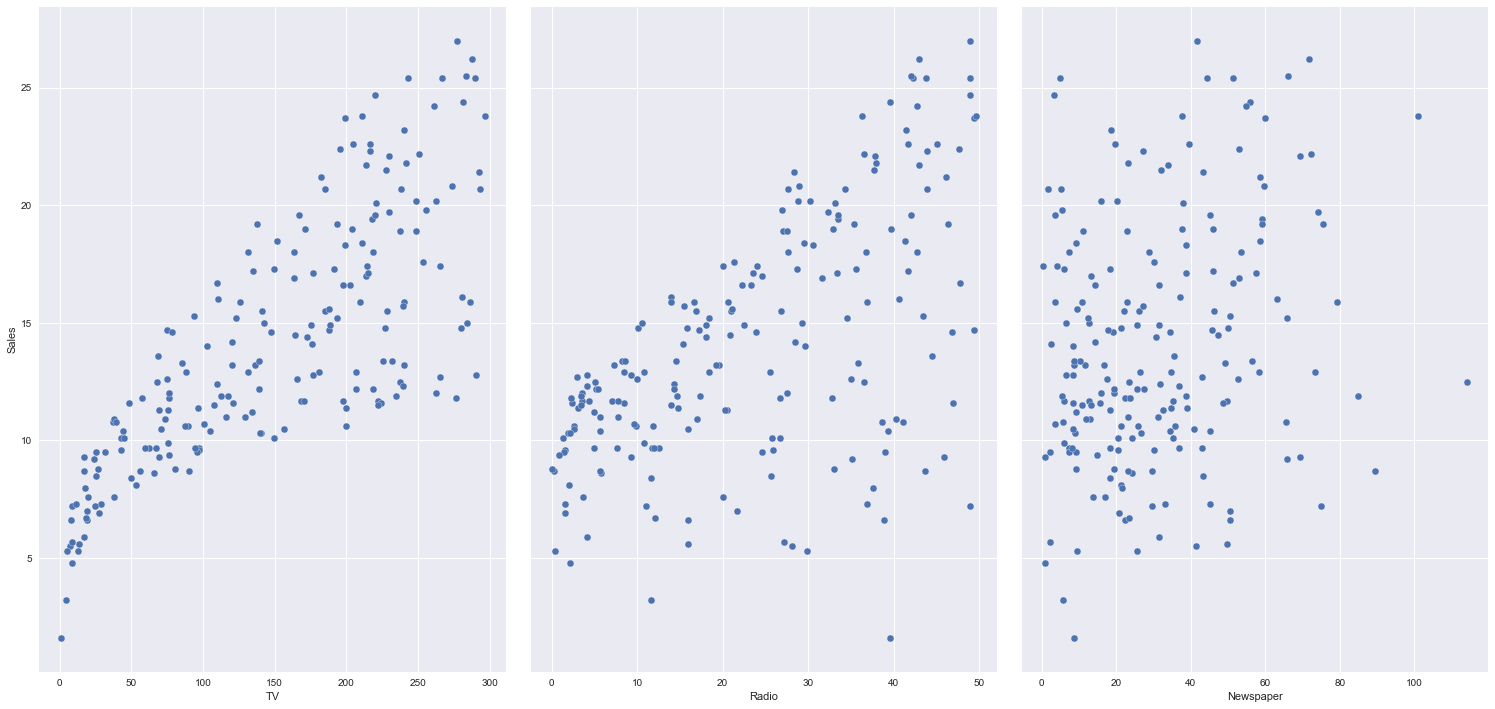

In [100]:
sns.pairplot(advertising,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter',aspect=.7,size=10)

In [103]:
X=advertising[['TV','Radio','Newspaper']]
y=advertising['Sales']
print(type(X))
X.head()

<class 'pandas.core.frame.DataFrame'>


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [104]:
print(type(y))
y.head()

<class 'pandas.core.series.Series'>


0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [129]:
x_train,x_test,y_train,y_test=train_test_split(X,y, train_size=0.7, random_state=100)

In [130]:
lr=LinearRegression()

In [131]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [132]:
coeff_d=pd.DataFrame(columns=['Coefficients'],data=lr.coef_,index=x_train.columns)
coeff_d.head()

,Coefficients
TV,0.045426
Radio,0.189758
Newspaper,0.004603


In [133]:
lr.intercept_

2.6527896688794943

In [134]:
y_pred=lr.predict(x_test)

In [135]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
r2=r2_score(y_test,y_pred)
print(r2)

1.85068199416
0.905862210753


In [136]:
x_train_sm=x_train
sm.add_constant(x_train_sm)
lm_1=sm.OLS(y_train,x_train_sm).fit()
print(lm_1.params)
print(lm_1.summary())

TV           0.052253
Radio        0.222851
Newspaper    0.019172
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2277.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):          1.21e-116
Time:                        11:09:15   Log-Likelihood:                -301.87
No. Observations:                 140   AIC:                             609.7
Df Residuals:                     137   BIC:                             618.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

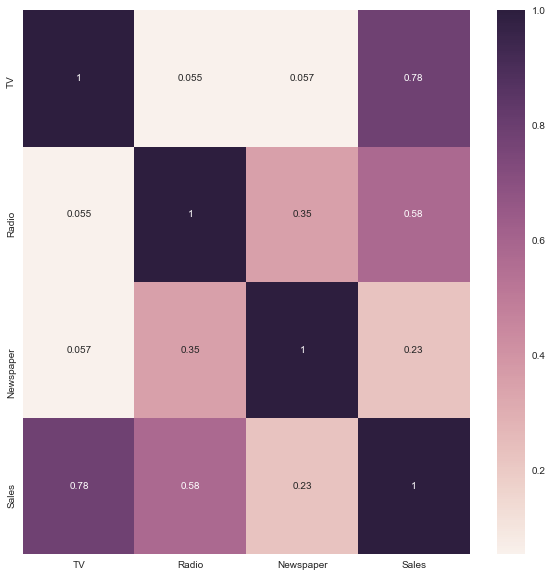

In [142]:
plt.figure(figsize=(10,10))
sns.heatmap(advertising.corr(),annot=True)
plt.show()

In [145]:
x_train_new=x_train[['TV','Radio']]
x_test_new=x_test[['TV','Radio']]

In [146]:
lr.fit(x_train_new,y_train)
y_pred=lr.predict(x_test_new)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(r2)

1.78474005209
0.909216449172


In [147]:
lm_2=sm.OLS(y_train,x_train_new).fit()
print(lm_2.params)
print(lm_2.summary())

TV       0.053510
Radio    0.238937
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     3310.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):          2.48e-117
Time:                        11:16:20   Log-Likelihood:                -304.52
No. Observations:                 140   AIC:                             613.0
Df Residuals:                     138   BIC:                             618.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
T

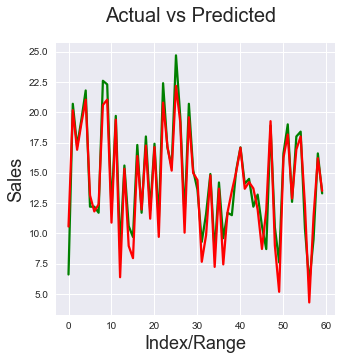

In [155]:
fig=plt.figure(figsize=(5,5))
c=[i for i in range(0,len(y_test),1)]
plt.plot(c,y_test,linestyle='-',linewidth=2.25,color='green')
plt.plot(c,y_pred,linestyle='-',linewidth=2.25,color='red')
fig.suptitle('Actual vs Predicted', fontsize=20)
plt.ylabel('Sales',fontsize=18)
plt.xlabel('Index/Range', fontsize=18)
plt.show()

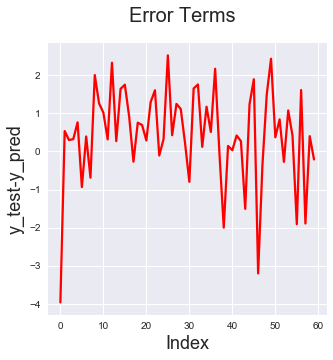

In [157]:
fig=plt.figure(figsize=(5,5))
c=[i for i in range(0,len(y_test),1)]
plt.plot(c,y_test-y_pred,linestyle='-',linewidth=2.25,color='red')
fig.suptitle('Error Terms', fontsize=20)
plt.ylabel('y_test-y_pred',fontsize=18)
plt.xlabel('Index', fontsize=18)
plt.show()

### Multiple Linear Regression: Manual

#### Scaling, Normalization, Dervied Variables, Dummy Variables and VIF

#### Eradicating of variables based on VIF, P-Value and Coefficient

In [176]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
housing=pd.read_csv('housing.csv')

In [178]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [179]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [180]:
housing.describe(include=['object'])

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [181]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [182]:
housing['airconditioning']=housing['airconditioning'].map({'yes':1,'no':0})

In [183]:
housing['mainroad']=housing['mainroad'].map({'yes':1,'no':0})
housing['guestroom']=housing['guestroom'].map({'yes':1,'no':0})
housing['basement']=housing['basement'].map({'yes':1,'no':0})
housing['hotwaterheating']=housing['hotwaterheating'].map({'yes':1,'no':0})
housing['prefarea']=housing['prefarea'].map({'yes':1,'no':0})

In [184]:
status=pd.get_dummies(housing['furnishingstatus'],drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [185]:
housing=pd.concat([housing,status],axis=1)
housing.drop('furnishingstatus',axis=1,inplace=True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


4


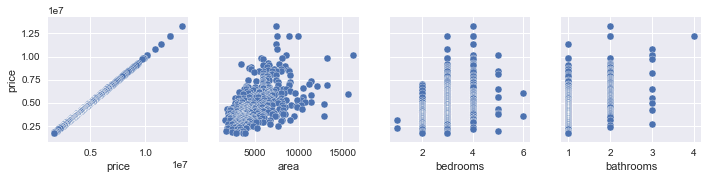

8


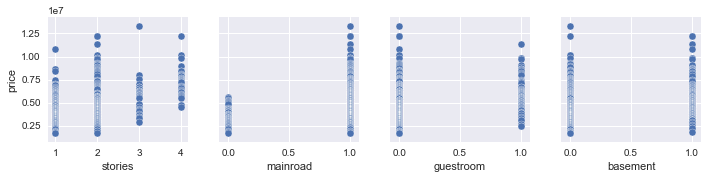

12


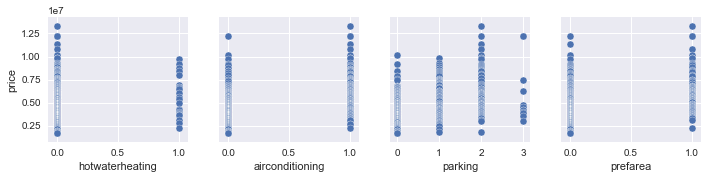

16


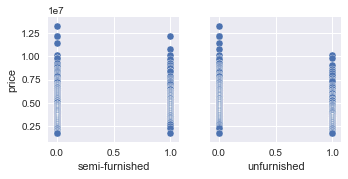

In [192]:
cols=housing.columns.tolist()
#print(cols)
start=0
for i in range(4,len(cols)+4,4):
    print(i)
    if start>len(cols):
        sns.pairplot(housing, x_vars=cols[start:len(cols)],y_vars='price')
    else:
        sns.pairplot(housing,x_vars=cols[start:i],y_vars='price')
    plt.show()
    start=i
#sns.pairplot(housing)
#plt.show()

#### Advanced Linear Regression

## Generalized Regression

In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
elec_con=pd.read_csv('total-electricity-consumption-us.csv')
elec_con.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


In [5]:
print(elec_con.shape)
print(elec_con.isnull().values.any())

(51, 2)
False


In [8]:
size=len(elec_con.index)
print(size)
index=range(0,size,5)
print(type(index),index)

51
<class 'range'> range(0, 51, 5)


In [9]:
train=elec_con[~elec_con.index.isin(index)]
test=elec_con[elec_con.index.isin(index)]
print(len(train))
print(len(test))

40
11


In [13]:
train.head()
X_train=train.Year.reshape(-1,1)
y_train=train.Consumption
X_test=test.Year.reshape(-1,1)
y_test=test.Consumption

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


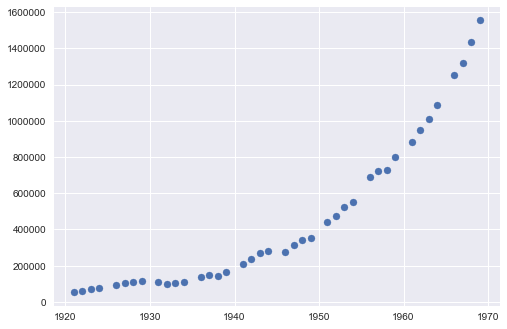

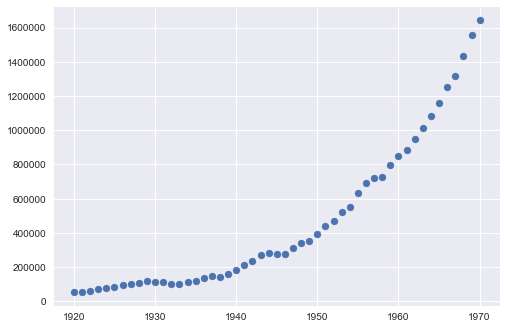

In [15]:
plt.scatter(X_train,y_train)
plt.show()
plt.scatter(elec_con['Year'],elec_con['Consumption'])
plt.show()

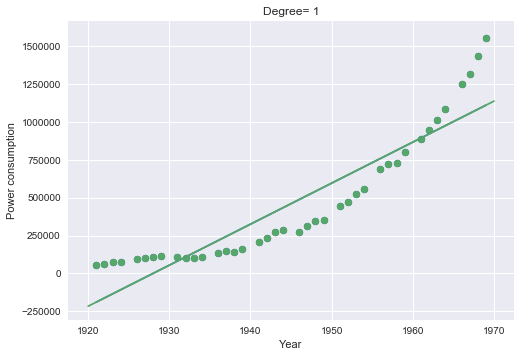

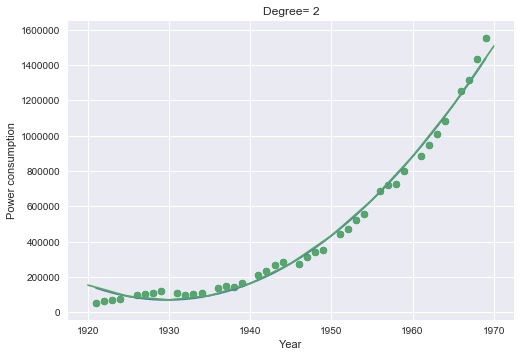

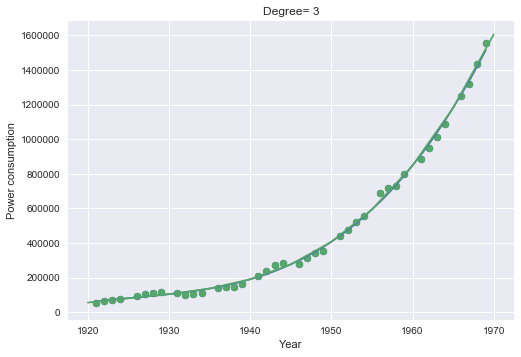

[1, 2, 3]
[0.84237474021761372, 0.99088967445532805, 0.9979789884378093]
[0.81651704638268097, 0.98760805027461362, 0.99848999185809362]


In [22]:
# Doing a polynomial regression: Comparing linear, quadratic and cubic fits
# Pipeline helps you associate two models or objects to be built sequentially with each other, 
# in this case, the objects are PolynomialFeatures() and LinearRegression()

r2_train = []
r2_test = []
degrees = [1, 2, 3]

for degree in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),
                     ('model', LinearRegression())])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2_test.append(r2_score(y_test, y_pred))
    
    # training performance
    y_pred_train = pipeline.predict(X_train)
    r2_train.append(r2_score(y_train, y_pred_train))
    
# plot predictions and actual values against year
    fig, ax = plt.subplots()
    ax.set_xlabel("Year")                                
    ax.set_ylabel("Power consumption")
    ax.set_title("Degree= " + str(degree))
    
    # train data in blue
    ax.scatter(X_train, y_train)
    ax.plot(X_train, y_pred_train)
    
    # test data
    ax.scatter(X_train, y_train)
    ax.plot(X_test, y_pred)
    
    plt.show()
print(degrees)
print(r2_train)
print(r2_test)

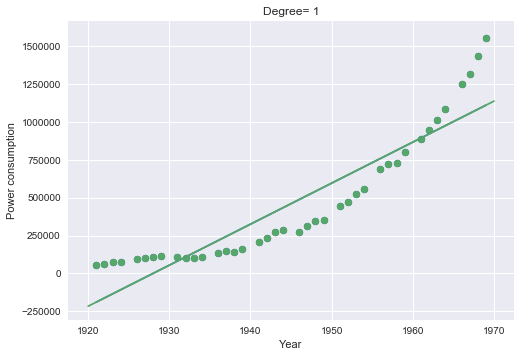

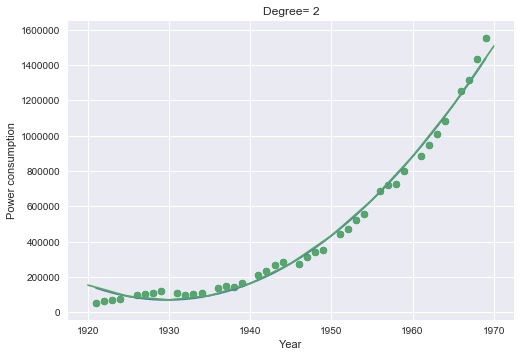

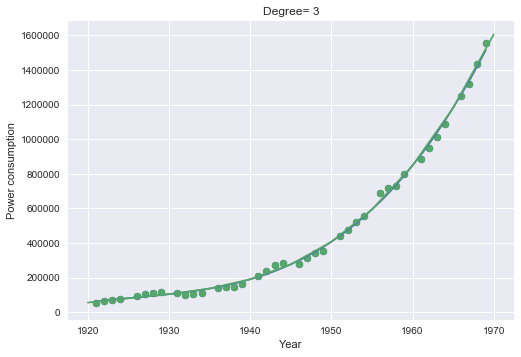

In [23]:
r2_train=[]
r2_test=[]
m_sq=[]
degrees=[1,2,3]
for degree in degrees:
    pipeline=Pipeline([('poly_features',PolynomialFeatures(degree=degree)),('model',LinearRegression())])
    pipeline.fit(X_train,y_train)
    y_pred=pipeline.predict(X_test)
    r2_test.append(r2_score(y_test,y_pred))
    m_sq.append(mean_squared_error(y_test,y_pred))
    y_pred_train=pipeline.predict(X_train)
    r2_train.append(r2_score(y_train,y_pred_train))
    
    fig, ax = plt.subplots()
    ax.set_xlabel("Year")                                
    ax.set_ylabel("Power consumption")
    ax.set_title("Degree= " + str(degree))
    
    # train data in blue
    ax.scatter(X_train, y_train)
    ax.plot(X_train, y_pred_train)
    
    # test data
    ax.scatter(X_train, y_train)
    ax.plot(X_test, y_pred)
    
    plt.show()

In [24]:
print(degrees)
print(r2_train)
print(r2_test)
print(m_sq)

[1, 2, 3]
[0.84237474021761372, 0.99088967445532805, 0.9979789884378093]
[0.81651704638268097, 0.98760805027461362, 0.99848999185809362]
[44996968464.482254, 3038975338.1102648, 370311178.24811101]


### Uderstanding how PolynomialFeatures work

In [33]:
df=pd.DataFrame({'Numbers':[1,2,3,4,5,6,7,8]})
df_mulitple_features=pd.DataFrame({'Numbers':[1,2,3,4,5],'Squares':[1,4,9,16,25]})

In [26]:
df

,Numbers
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8


In [32]:
make_features=PolynomialFeatures(degree=6)
univariate_poly=make_features.fit_transform(df)
pd.DataFrame(univariate_poly)

,0,1,2,3,4,5,6
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0,32.0,64.0
2,1.0,3.0,9.0,27.0,81.0,243.0,729.0
3,1.0,4.0,16.0,64.0,256.0,1024.0,4096.0
4,1.0,5.0,25.0,125.0,625.0,3125.0,15625.0
5,1.0,6.0,36.0,216.0,1296.0,7776.0,46656.0
6,1.0,7.0,49.0,343.0,2401.0,16807.0,117649.0
7,1.0,8.0,64.0,512.0,4096.0,32768.0,262144.0


In [34]:
make_features=PolynomialFeatures(degree=2)
univariate_poly=make_features.fit_transform(df_mulitple_features)
pd.DataFrame(univariate_poly)

,0,1,2,3,4,5
0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,4.0,8.0,16.0
2,1.0,3.0,9.0,9.0,27.0,81.0
3,1.0,4.0,16.0,16.0,64.0,256.0
4,1.0,5.0,25.0,25.0,125.0,625.0
